# Learning to code mathematics in Python
Mr. Yuen, 2021

# Table of Contents

`0: Importing our setups`

`1: Introduction to Python`

    1.1: Calculations
    
`2: Graphing`

     2.1: Graphing Functions in 2D
     2.2: Graphing 3D objects
     2.3: Types of Graphs
    
`3: Solving`

    3.1: Solving Systems of Equations
    3.2: Solving Derivatives
    3.3: Solving Integrals


# 0: Import our setups

It is important that we import the following packages in the Python programming language so that we can use these built-in features. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
import scipy.integrate as spi

[Numpy](https://numpy.org/) offers comprehensive mathematical functions and features. 

[Matplotlib](https://matplotlib.org/) is a visualization package within Python that allows for creating graphs and other interactive visualization features. 

[Scipy](https://www.scipy.org/) is a Python package that contains the SciPy library in addition to Numpy and Matplotlib features. 

# 1: Introduction to Python

## 1.1: Calculations

Python can allow us to perform mathematical computations. 

In [34]:
1+1

2

Writing a function for: 
$$f(x) = x^2$$

In [35]:
def f(x):
    return x**2

In [36]:
f(2)

4

In [37]:
f(99)

9801

Let's build off of this and write a new function that includes transformations for $f(x) = x^2$. 

$$f(x) = a(bx+c)^2+d$$

Recall that: 

$a$ is the vertical stretch (expansion/compression) 

$b$ is the horizontal stretch (expansion/compression)

$c$ is the horizontal shift (left/right)

$d$ is the vertical shift (up/down). 

In [40]:
def f(x,a,b,c,d):
    return a*(b*(x+c)**2)+d

In [46]:
f(2,1,1,0,0)

4

# 2: Graphing

We can use the function `np.linspace(a,b,c)` to set up a range of x values. 

a is the minimum x-value, or x-min

b is the maximum x-value, or x-max

c is the number of "steps" between each x-value EVENLY spaced

In [50]:
np.linspace?

In [48]:
np.linspace(-5,5,10)

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

We can plot functions using the build-in function `plt.plot(x,y)` which takes an array of x-values for `x` and a function `y`. 

In [49]:
plt.plot?

## 2.1: Graphing Functions in 2D 

**Example:** Graph $$ f(x) = x^2$$ 

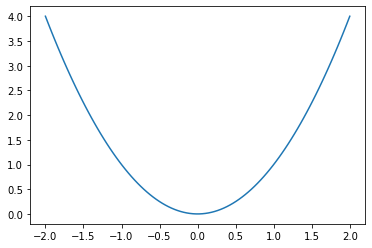

In [2]:
x = np.linspace(-2,2,100)
y = x**2
plt.plot(x,y)

**Example:** Graph $$ f(x) = a(bx+c)^2+d$$ 

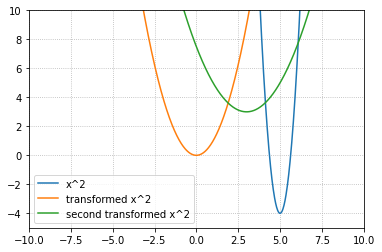

In [80]:
x = np.linspace(-10,10,1000)
y = f(x,2,5,-5,-4)
# vertical stretch by a factor of 2, horizontal stretch by a factor of 1/5, translate 5 right and 4 down
y1 = x**2
plt.plot(x,y, label = 'x^2')
plt.plot(x,y1, label = 'transformed x^2')

y2 = f(x,1,1/2,-3,3)
# horizontal stretch by a factor of 2, translate 3 right and 3 up
plt.plot(x,y2, label = 'second transformed x^2')


plt.legend()
plt.grid(True, linestyle = ':')
plt.xlim([-10,10])
plt.ylim([-5,10])
plt.show()

**Example:** Graph $\sin x, \cos x, \tan x$ on the same grid. 

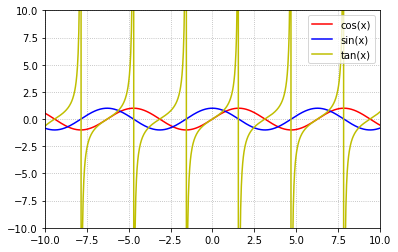

In [15]:
x = np.linspace(-10,10,1000)

# Plotting sin(x)
y = np.sin(x)
plt.plot(x,y,'r', label = 'cos(x)')

# Plotting cos(x)
y1 = np.cos(x)
plt.plot(x,y1,'b', label = 'sin(x)')

# Plotting tan(x)
y2 = np.tan(x)
plt.plot(x,y2,'y', label = 'tan(x)')

# Setting up the graph 
plt.legend()
plt.grid(True, linestyle = ':')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

**Example:** Plotting a straight spiral where $\theta\in[0,10\pi]$, radius, $r$, of $\theta^2$ and $x = r\cos(\theta), y = r\sin(\theta)$. 

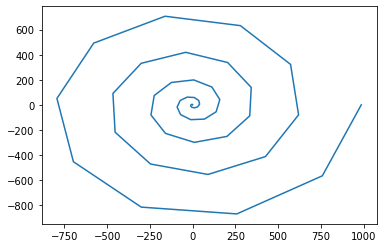

In [110]:
# begin by creating two empty lists for x = rcos(theta) and y = rsin(theta)
x = []
y = []

# set up a for loop to append each straight edge. 
for theta in np.linspace(0,10*np.pi):
    r = ((theta)**2)
    x.append(r*np.cos(theta))
    y.append(r*np.sin(theta))

plt.plot(x,y)  
plt.show()

**Example:** Let's graph the [Butterfly Curve](https://en.wikipedia.org/wiki/Butterfly_curve_(transcendental)) given by: 

$$x = \sin(t)\left(e^{\cos(t)}-2\cos(4t)-\sin^5\left(\frac{t}{12}\right)\right)$$
$$y = \cos(t)\left(e^{\cos(t)}-2\cos(4t)-\sin^5\left(\frac{t}{12}\right)\right)$$

for $t\in[0,12\pi]$. 

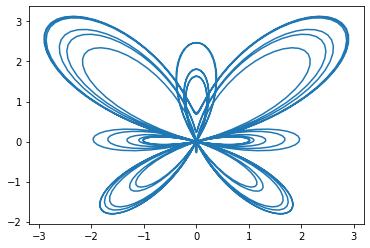

In [76]:
t = np.linspace(0,12*np.pi,1000)
x = np.sin(t)*(np.exp(np.cos(t))-2*np.cos(4*t)-np.sin(t/12)**5)
y = np.cos(t)*(np.exp(np.cos(t))-2*np.cos(4*t)-np.sin(t/12)**5)

plt.figure()
plt.plot(x,y)

**Exercise:** Plot the [Lissajous curve](https://en.wikipedia.org/wiki/Lissajous_curve) given by 

$$x = A\sin(at+\delta)$$ 

$$y = B\sin(bt)$$

where $A, B, a, b, \delta \in\mathbb{Z}$

**Exercise:** Plot the [Cochleoid](https://en.wikipedia.org/wiki/Cochleoid) given by 
$$ x = \frac{a\sin(t)\cos(t)}{t}$$
$$ y = \frac{a\sin(t)^2}{t} $$ 

where $a\in\mathbb{Z}$ and $t$ is the period. 

**Exercise:** Plot a smooth spiral where $\theta\in[0,1800^o], x = r\cos(\theta), y = r\sin(\theta)$. 

Hint: `theta = np.radians(np.linspace(0,360*5,1000))`

## 2.2: Graphing 3D objects 

[mplot3d](https://matplotlib.org/2.2.2/mpl_toolkits/mplot3d/index.html) is matplotlib's 3D plotting library. To create a 3D plot, we first have to import the Axes3D class from mplot3d:

In [130]:
from mpl_toolkits.mplot3d import Axes3D

**Example:** 

Let's try plotting a 3D surface: $z = 1-x^2-y^2$ for $x,y\in[-1,1]$. 

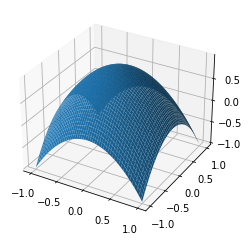

In [131]:
plt.figure() # Creates a new figure
ax = plt.axes(projection='3d') # Create a new Axes3D object in the current figure

x = np.linspace(-1,1,100) # Create 1D array of x values
y = np.linspace(-1,1,100) # Create 1D array of y values
X, Y = np.meshgrid(x,y) # Create 2D arrays of x and y values
Z = 1 - X**2 - Y**2 # Create 2D array of z values
ax.plot_surface(X,Y,Z); # Plot the surface in the current Axes3D object

**Example:** Plot $z = \cos(\sqrt{x^2+y^2})$ for $x,y,\in[-4\pi,4\pi]$. 

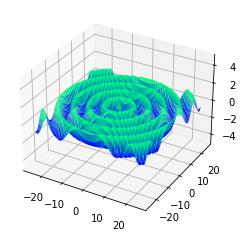

In [132]:
plt.figure() # Create a new figure
ax = plt.axes(projection='3d') # Create a new Axes3D object in the current figure

x = np.linspace(-8*np.pi,8*np.pi,500)
y = np.linspace(-8*np.pi,8*np.pi,500)
X, Y = np.meshgrid(x,y)
Z = np.cos( np.sqrt(X**2 + Y**2) )
ax.plot_surface(X,Y,Z,cmap=plt.cm.winter), ax.set_zlim(bottom=-5,top=5);

Like many 3D plotting libraries (ie. MATLAB), the 3D plotting functions require 2D matrices of x, y, and z values. Meshgrid takes x and y arrays and returns two 2D matrices X and Y with X has the x values across its rows and Y has the y values down its columns.

**Example:** Plot a sphere using parameters $\theta, \phi$ in spherical coordinates

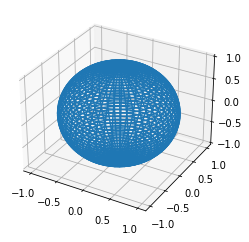

In [133]:
plt.figure() # Create a new figure
ax = plt.axes(projection='3d') # Create a new Axes3D object in the current figure

phi = np.linspace(0,np.pi,50)
theta = np.linspace(0,2*np.pi,50)

PHI, THETA = np.meshgrid(phi,theta)

X = np.sin(PHI) * np.cos(THETA)
Y = np.sin(PHI) * np.sin(THETA)
Z = np.cos(PHI)

ax.plot_wireframe(X,Y,Z,cmap=plt.cm.winter);

**Example:** Visualizing the Mobius Strip from [VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html). 

A [Mobius strip](https://en.wikipedia.org/wiki/M%C3%B6bius_strip#:~:text=The%20M%C3%B6bius%20strip%20is%20the,c.%20200%E2%80%93250%20AD.) is the simplest non-orientable surface with just one side. It can be created by taking a piece of paper, half twisting, and connecting both ends. 

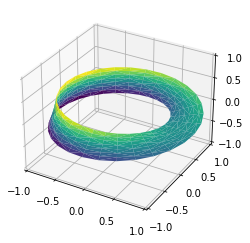

In [84]:
theta = np.linspace(0, 2 * np.pi, 30) # theta angle from 0 to 2pi
w = np.linspace(-0.25, 0.25, 8) # width of mobius strip
w, theta = np.meshgrid(w, theta) # creating a meshgrid of the angle and width

phi = 0.5 * theta # half twist of the strip

# radius in x-y plane
r = 1 + w * np.cos(phi)

# creating a 3D embedding of (x,y,z) coordinates 
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

**Exercise:** Plot: $$z = \frac{1}{1+x^2+2y^2} \text{ for } x,y\in[-2,2]$$

**Exercise:** Plot: $$z = \sqrt{1+x^2+y^2} \text{ for } x,y\in[-2,2]$$

**Exercise:** Plot: $$z = x^2-y^2 \text{ for } x,y\in[-2,2]$$

**Exercise:** Plot $$z=e^{-x^2-y^2}\cos(5(x^2+y^2)) \text{ for } x,y\in[-2,2]$$

**Exercise:** Plot the Torus given by: 

\begin{align}
x = (R + r\cos(\theta))\cos(\phi) \\
y = (R + r\cos(\theta))\sin(\phi) \\
z = r\sin(\theta)
\end{align}

where $R = 3, r = 1, \theta\in[0,2\pi], \phi\in[0,2\pi]$

## 2.3: Types of Plots

**Example:** Scatterplot

In [120]:
plt.scatter?

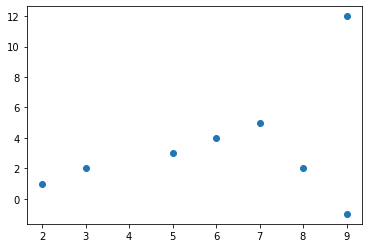

In [121]:
x = [2,3,5,6,7,8,9,9] # our x-values
y = [1,2,3,4,5,2,12,-1] # our y-values

# when we call plt.scatter(x,y), Python will create an ordered pair with the corresponding list number item in x,y
plt.scatter(x,y)

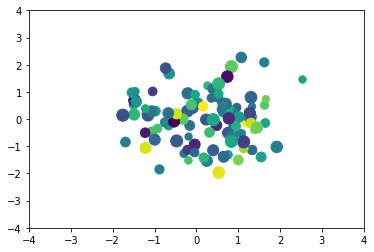

In [113]:
n = 100 
samples = np.random.randn(n,2)
colours = np.random.randn(n)
sizes = np.random.randint(50,151,n)
plt.scatter(samples[:,0],samples[:,1],s=sizes,c=colours)
plt.xlim([-4,4])
plt.ylim([-4,4]);

**Example:** Histograph using `samples.` 

In [119]:
plt.hist?

(array([[ 3., 12., 11., 10., 12., 17., 19., 12.,  3.,  1.],
        [ 4., 12., 10., 14., 19., 21., 11.,  4.,  4.,  1.]]),
 array([-1.96770685, -1.51725478, -1.06680271, -0.61635065, -0.16589858,
         0.28455349,  0.73500556,  1.18545762,  1.63590969,  2.08636176,
         2.53681383]),
 <a list of 2 BarContainer objects>)

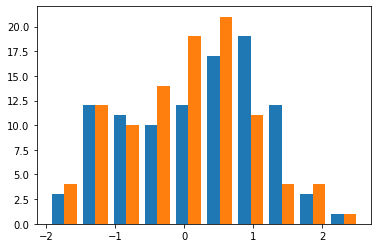

In [117]:
plt.hist(samples)

We can also use `plt.bar(x,y)` to create a bar graph. 

In [127]:
plt.bar?

<BarContainer object of 8 artists>

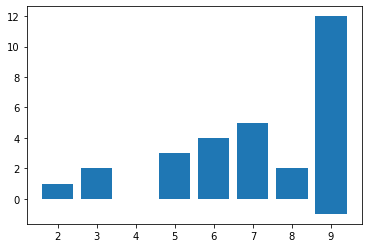

In [128]:
plt.bar(x,y)

`plt.plot(x,y)` will create a line graph. 

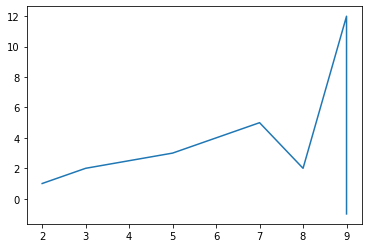

In [122]:
plt.plot(x,y)

# 3: Solving

## 3.1: Solving Systems of Equations

When solving Systems of Equations, we rewrite our system as an array or matrix. Essentially, an array or matrix consists of the coefficients of each variable listed in the order they appear. 

For example, 
\begin{align}
x+y+z \\
2x-y \\ 
3y+z 
\end{align}

We can use the command `np.array` to create an $n$ by $m$ matrix. 

In [54]:
np.array?

In [53]:
np.array([[1,1,1],
    [2,-1,0],
    [0,3,1]])

array([[ 1,  1,  1],
       [ 2, -1,  0],
       [ 0,  3,  1]])

In [129]:
plt.line(x,y)

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

Our first column is the x values, second column is the y values, and third column is the z values. 

**Example:** Consider the system of equations: 

\begin{align}
2x+5y-z = 1 \\ 
x-y+2z = 2 \\ 
3x-y+2z = -1
\end{align}


In [21]:
# Set up the system as an array taking the coefficients of the LHS
A = np.array([[2,5,-1], [1,-1,2], [3,-1,2]])
A

array([[ 2,  5, -1],
       [ 1, -1,  2],
       [ 3, -1,  2]])

In [24]:
# Set up the solution to the linear equation as an 3x1 array
B = np.array([[1], [2], [-1]])
B

array([[ 1],
       [ 2],
       [-1]])

In [29]:
# We can use la.solve to determine the solution to this system of equations
x = la.solve(A,B)
x

array([[-1.5       ],
       [ 1.27777778],
       [ 2.38888889]])

In [55]:
la.solve?

In [30]:
# Check our solution: 
A @ x 

array([[ 1.],
       [ 2.],
       [-1.]])

**Example:** Consider the systems of equations: 

\begin{align}
3x = 30 \\ 
x+2y=18 \\ 
y-z=2
\end{align}

In [3]:
A = np.array([[3,0,0], [1,2,0], [0,1,-1]])
A

array([[ 3,  0,  0],
       [ 1,  2,  0],
       [ 0,  1, -1]])

In [5]:
b = np.array([[30],[18],[2]])
b

array([[30],
       [18],
       [ 2]])

In [6]:
x = la.solve(A,b)
x

array([[10.],
       [ 4.],
       [ 2.]])

In [7]:
# Check our solution: 
A @ x

array([[30.],
       [18.],
       [ 2.]])

**Exercise:** Solve: 

\begin{align}
2x-1 = 1 \\ 
3x+3 = 5 \\ 
\end{align}

**Exercise:** Solve: 
\begin{align}
5x-3y=18 \\ 
4x-6y=18
\end{align}

**Exercise:** Solve
\begin{align}
\frac{2x}{3}-y = 1 \\ 
-x-y=-4 
\end{align}

## 3.2: Solving Derivatives

In [2]:
import sympy as sym

In [4]:
sym?

[Sympy](https://sympy.org) is a python library from symbolic mathematics. We can use it to nicely perform derivative calculations in Python. We need to first need to define our variable for `Sympy`. 

In [7]:
x = sym.Symbol('x')

In [8]:
sym.diff(x**5)

5*x**4

Notice that we have just performed Power Rule in Python! 

**Example:** Take the derivative of the trig functions, $\sin(x), \cos(x), \tan(x), \csc(x), \sec(x), \cot(x)$. 

In [12]:
sym.diff(sym.sin(x))

cos(x)

In [11]:
sym.diff(sym.cos(x))

-sin(x)

In [13]:
sym.diff(sym.tan(x))

tan(x)**2 + 1

In [14]:
sym.diff(sym.csc(x))

-cot(x)*csc(x)

In [15]:
sym.diff(sym.sec(x))

tan(x)*sec(x)

In [16]:
sym.diff(sym.cot(x))

-cot(x)**2 - 1

We can also use `sym.diff` to perform Chain Rule. 

**Example:** $\frac{d}{dx} (x^2-3x+5)^3$

In [17]:
sym.diff((x**2-3*x+5)**3)

(6*x - 9)*(x**2 - 3*x + 5)**2

When performing partial derivatives, we need to define our variables using `sym.symbols()`

In [19]:
x, y = sym.symbols('x y')

**Example:** $\frac{d}{dx} x^2y$ and $\frac{d}{dy} x^2y$

In [20]:
sym.diff(x**2*y,x)

2*x*y

In [21]:
sym.diff(x**2*y,y)

x**2

**Example:** $f = x^2yz^5$. Find $\partial_x, \partial_y, \partial_z$

In [22]:
x,y,z = sym.symbols('x y z')

In [23]:
f = x**2*y*z**5

In [24]:
sym.diff(f,x)

2*x*y*z**5

In [25]:
sym.diff(f,y)

x**2*z**5

In [27]:
sym.diff(f,z)

5*x**2*y*z**4

We can use also use the `sympy` library to set up Product Rule. 

**Example:** $f(x) = (x^2+1)\cos(x)$

In [29]:
sym.diff((x**2+1)*sym.cos(x))

2*x*cos(x) - (x**2 + 1)*sin(x)

**Example:** $f(y) = (y-4)(2y+y^2)$

In [31]:
sym.diff((y-4)*(2*y+y**2))

y**2 + 2*y + (y - 4)*(2*y + 2)

In [32]:
sym.diff(2*y**2+y**3-8*y-4*y**2)

3*y**2 - 4*y - 8

**Exercises:** 
1. Derivative of $6x^3-9x+4$
2. Derivative of $2t^4-10t^2+13t$
3. Derivative of $\frac{4}{t} - \frac{1}{6t^3} + \frac{8}{t^5}$ 
4. Derivative of $2\cos(z)+6\cos(z)^{-1}$
5. Derivative of $5x^6-\sec(x)^{-1}$
6. Derivative of $\frac{\sin(x)^{-1}}{1+x}$
7. Derivative of $2e^x-8^x$
8. Derivative of $4\log_3(t)-\ln(t)$
9. Derivative of $10\tan(z)-2\cot(z)$
10. Derivative of $\tan(w)\sec(w)$

## 3.3: Solving Integrals

We can approximate integrals using `scipy.integrate.trapz`. All we need to do is create arrays `y`, `x`, which correspond to the x-values and y-values of the interval we want to integrate. 

Let's try integrating $\int_0^\pi \sin(x)dx$ using Trapezoidal approximation. 

In [20]:
x = np.linspace(0,np.pi,1000)
y = np.sin(x)
spi.trapz(y,x)

1.999998351770852

To see that this was correct, try integrating $\sin(x) dx$ from 0 to $\pi$ which gives $-\cos(x)$ from 0 to $\pi$. 

We can then evaluate $-\cos(\pi) - (-\cos(0))$

In [22]:
-(np.cos(np.pi))-(-np.cos(0))

2.0

We can approximate the same integral using Simpson's Rule by the built in feature `scipy.integrate.simps`. 

In [21]:
spi.simps(y,x)

1.9999999999970117

There is another integration technique called `scipy.integrate.quad` which takes a function in the first argument, followed by two values separated by a comma as the lower and upper limit of integration. `scipy.integrate.quad` returns two results in a tuple. The first part of the tuple is the answer to the integration and the second part of the tuple is the error. 

Eg. `scipy.integrate.quad(f,a,b)`

Integrate $$\int_0^\pi \frac{x^2e^x}{\sqrt{(e^x-1)^3}}dx = 8\pi\ln2$$

In [38]:
# Setting up the integral for the LHS 
def f(x):
    return (x**2)*np.exp(x)/(np.sqrt(np.exp(x)-1)**3)

# Integrate f(x) from [0,100]
spi.quad(f,0,100)

(17.420688722431635, 1.799792315182458e-07)

In [40]:
# Compare the answer of this integral to the RHS
8*np.pi*np.log(2)

17.420688722428817

**Exercise:** Use all three functions `trapz`, `simps`, `quad` to integrate $$ \int_0^1 xe^{-x^2}dx = \frac{1}{2}(1-\frac{1}{e}) $$ 

**Exercise:** Use all three functions `trapz`, `simps`, `quad` to integrate $$\int_0^1 \ln(x)\ln(1-x)dx = 2 - \frac{\pi^2}{6}$$ 

**Exercise:** Use all three functions `trapz`, `simps`, `quad` to integrate $$\int_0^{\frac{\pi}{2}} \frac{x^3\cos x}{\sin^3x}dx = \frac{3}{2}\pi\ln2 - \frac{\pi^3}{16} $$ 